### **1. PyCaret**

- 머신러닝 워크플로우를 자동화하는 **Python의 AutoML 라이브러리**
    - 기존 Scikit-learn, XGBoost, LightGBM, spaCy 등 다양한 **머신러닝 라이브러리를 ML High-Level API**로 제작
    - 데이터 분석 및 머신러닝 모델 성능 비교,  Log 생성 및 이력 확인 가능
- [Pycaret 공식문서](https://pycaret.gitbook.io/docs/)










In [ ]:
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user
# 설치 후 런타임 다시시작

In [ ]:
import sklearn
!pip install pycaret
from pycaret.utils import enable_colab
enable_colab()
!pip install markupsafe==2.0.1
# 설치 후 런타임 다시시작

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



- PyCaret 지원 모듈
    1. 지도학습
        - 분류
        - 회귀
    2. 비지도학습
        - 클러스터링
        - 이상탐지
        - 자연어처리
        - 연관규칙마이닝
    3. 시계열
    4. 데이터셋


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import os
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

train = pd.read_csv('./drive/MyDrive/input/유전체 정보 품종 분류 AI 경진대회/train.csv') # trait : 1(69개),2(193개) / SNP_01	/ class : B(114개),C(79개),A(69개)
test = pd.read_csv('./drive/MyDrive/input/유전체 정보 품종 분류 AI 경진대회/test.csv') # trait : 1(51개),2(124개)
train

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,...,A A,G A,A A,G G,A G,G A,A A,A A,A A,B
258,TRAIN_258,0,0,0,2,G G,A A,C A,A A,A A,...,G A,G A,A A,A G,A G,A A,A G,A A,G A,C
259,TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,...,G G,G A,G A,A A,G G,G G,G G,C A,G G,A
260,TRAIN_260,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G A,A G,A G,G A,G G,C A,G G,A


In [ ]:
train['SNP_01_first'] = train['SNP_01'].str.get(0)
train['SNP_01_last'] = train['SNP_01'].str.get(2)
train['SNP_02_first'] = train['SNP_02'].str.get(0)
train['SNP_02_last'] = train['SNP_02'].str.get(2)
train['SNP_03_first'] = train['SNP_03'].str.get(0)
train['SNP_03_last'] = train['SNP_03'].str.get(2)
train['SNP_04_first'] = train['SNP_04'].str.get(0)
train['SNP_04_last'] = train['SNP_04'].str.get(2)
train['SNP_05_first'] = train['SNP_05'].str.get(0)
train['SNP_05_last'] = train['SNP_05'].str.get(2)
train['SNP_06_first'] = train['SNP_06'].str.get(0)
train['SNP_06_last'] = train['SNP_06'].str.get(2)
train['SNP_07_first'] = train['SNP_07'].str.get(0)
train['SNP_07_last'] = train['SNP_07'].str.get(2)
train['SNP_08_first'] = train['SNP_08'].str.get(0)
train['SNP_08_last'] = train['SNP_08'].str.get(2)
train['SNP_09_first'] = train['SNP_09'].str.get(0)
train['SNP_09_last'] = train['SNP_09'].str.get(2)
train['SNP_10_first'] = train['SNP_10'].str.get(0)
train['SNP_10_last'] = train['SNP_10'].str.get(2)
train['SNP_11_first'] = train['SNP_11'].str.get(0)
train['SNP_11_last'] = train['SNP_11'].str.get(2)
train['SNP_12_first'] = train['SNP_12'].str.get(0)
train['SNP_12_last'] = train['SNP_12'].str.get(2)
train['SNP_13_first'] = train['SNP_13'].str.get(0)
train['SNP_13_last'] = train['SNP_13'].str.get(2)
train['SNP_14_first'] = train['SNP_14'].str.get(0)
train['SNP_14_last'] = train['SNP_14'].str.get(2)
train['SNP_15_first'] = train['SNP_15'].str.get(0)
train['SNP_15_last'] = train['SNP_15'].str.get(2)

test['SNP_01_first'] = test['SNP_01'].str.get(0)
test['SNP_01_last'] = test['SNP_01'].str.get(2)
test['SNP_02_first'] = test['SNP_02'].str.get(0)
test['SNP_02_last'] = test['SNP_02'].str.get(2)
test['SNP_03_first'] = test['SNP_03'].str.get(0)
test['SNP_03_last'] = test['SNP_03'].str.get(2)
test['SNP_04_first'] = test['SNP_04'].str.get(0)
test['SNP_04_last'] = test['SNP_04'].str.get(2)
test['SNP_05_first'] = test['SNP_05'].str.get(0)
test['SNP_05_last'] = test['SNP_05'].str.get(2)
test['SNP_06_first'] = test['SNP_06'].str.get(0)
test['SNP_06_last'] = test['SNP_06'].str.get(2)
test['SNP_07_first'] = test['SNP_07'].str.get(0)
test['SNP_07_last'] = test['SNP_07'].str.get(2)
test['SNP_08_first'] = test['SNP_08'].str.get(0)
test['SNP_08_last'] = test['SNP_08'].str.get(2)
test['SNP_09_first'] = test['SNP_09'].str.get(0)
test['SNP_09_last'] = test['SNP_09'].str.get(2)
test['SNP_10_first'] = test['SNP_10'].str.get(0)
test['SNP_10_last'] = test['SNP_10'].str.get(2)
test['SNP_11_first'] = test['SNP_11'].str.get(0)
test['SNP_11_last'] = test['SNP_11'].str.get(2)
test['SNP_12_first'] = test['SNP_12'].str.get(0)
test['SNP_12_last'] = test['SNP_12'].str.get(2)
test['SNP_13_first'] = test['SNP_13'].str.get(0)
test['SNP_13_last'] = test['SNP_13'].str.get(2)
test['SNP_14_first'] = test['SNP_14'].str.get(0)
test['SNP_14_last'] = test['SNP_14'].str.get(2)
test['SNP_15_first'] = test['SNP_15'].str.get(0)
test['SNP_15_last'] = test['SNP_15'].str.get(2)
train.shape

(262, 51)

In [ ]:
train['SNP_01'].str.get(2)

0      G
1      G
2      G
3      A
4      G
      ..
257    G
258    G
259    G
260    A
261    G
Name: SNP_01, Length: 262, dtype: object

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      262 non-null    object
 1   father  262 non-null    int64 
 2   mother  262 non-null    int64 
 3   gender  262 non-null    int64 
 4   trait   262 non-null    int64 
 5   SNP_01  262 non-null    object
 6   SNP_02  262 non-null    object
 7   SNP_03  262 non-null    object
 8   SNP_04  262 non-null    object
 9   SNP_05  262 non-null    object
 10  SNP_06  262 non-null    object
 11  SNP_07  262 non-null    object
 12  SNP_08  262 non-null    object
 13  SNP_09  262 non-null    object
 14  SNP_10  262 non-null    object
 15  SNP_11  262 non-null    object
 16  SNP_12  262 non-null    object
 17  SNP_13  262 non-null    object
 18  SNP_14  262 non-null    object
 19  SNP_15  262 non-null    object
 20  class   262 non-null    object
dtypes: int64(4), object(17)
memory usage: 43.1+ KB



### **3. PyCaret 분류 관련 메서드 및 파라미터**

#### **3-1. 데이터 준비**
- **pycaret.classification.setup()**
    - pycaret을 사용하기 위해 setup으로 데이터 로드
> **pycaret.classification.setup**(data: Union[pandas.core.frame.DataFrame, Callable[[], pandas.core.frame.DataFrame]], target: str, train_size: float = 0.7, test_data: Optional[pandas.core.frame.DataFrame] = None, normalize: bool = False, normalize_method: str = 'zscore', n_jobs: Optional[int] = - 1, session_id: Optional[int] = None, ...)

    - **data** : 학습 데이터셋
    - **target** : 종속변수 컬럼명
    - **train_size** : train, test 데이터셋 비율
    - **normalize** : 스케일링 여부
    - **normalize_method** : 스케일링 방법을 정의
    - **n_jobs** : 사용할 CPU 코어 개수 (1: 기본값, -1: 모든 코어 다 사용)
    - **session_id** : scikit-learn의 random_state와 동일

#### **3-2. 모델 생성 및 비교**
- **pycaret.classification.compare_models()**
    - 머신러닝 모델 적용 및 비교
> **pycaret.classification.compare_models**(include: Optional[List[Union[str, Any]]] = None, exclude: Optional[List[str]] = None, fold: Optional[Union[int, Any]] = None, round: int = 4, cross_validation: bool = True, sort: str = 'Accuracy', n_select: int = 1, budget_time: Optional[float] = None, turbo: bool = True, errors: str = 'ignore', ...)
    - **include** : 포함할 머신러닝 모델 유형
    - **exclude** : 제외할 머신러닝 모델 유형
    - **fold** : 교차 검증(k)
    - **sort** : 정렬 기준 스코어
    - **n_select** : 반환할 top_n 모델 수

- **pycaret.classification.create_model()**
    - 머신러닝 모델 선택 및 생성

#### **3-3. 모델 최적화**
- **pycaret.classification.tune_model()**
    - 하이퍼파라미터 최적화
- **pycaret.classification.ensemble_model()**
    - ensemble 기법
- **pycaret.classification.blend_models()**
    - Voting 기법

#### **3-4. 학습된 모델 분석**
- **pycaret.classification.predict_model()**
    - 테스트 데이터셋으로 모델 평가
- **pycaret.classification.evaluate_model()**
    - 모델 성능평가 인터페이스 제공
- **pycaret.classification.plot_model()**
    - 모델 성능평가 시각화
- **pycaret.classification.interpret_model()**
    - 모델 파라미터 영향도 시각화


> 구체적인 라이브러리 사용법  
    [pycaret.classification](https://pycaret.readthedocs.io/en/latest/api/classification.html)




### **5. PyCaret 활용**




In [ ]:
#train데이터의 id, fateher, mother, gender은 필요없는 변수이므로 제거 test도 마찬가지
train=train.iloc[:,4:]
test=test.iloc[:,4:]

In [ ]:
train.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,2,G G,A G,A A,G A,C A,A A,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,2,A G,A G,C A,A A,A A,A G,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,2,G G,G G,A A,G A,C C,G G,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,1,A A,G G,A A,G A,A A,G G,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,2,G G,G G,C C,A A,C C,A A,A A,A A,A A,G G,A A,A A,A G,A A,G A,C


In [ ]:
#자동으로 label encoding 진행
from pycaret.classification import *

# 1. 데이터 준비
setup_clf = setup(data=train, target='class', train_size=0.8,
                  session_id=777)

,Description,Value
0,session_id,777
1,Target,class
2,Target Type,Multiclass
3,Label Encoded,"A: 0, B: 1, C: 2"
4,Original Data,"(262, 17)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
# 2. 모델 비교
model = compare_models(sort='F1',fold=3,n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9522,0.9925,0.9562,0.9565,0.9520,0.9265,0.9291,1.2133
ridge,Ridge Classifier,0.9522,0.0000,0.9562,0.9565,0.9520,0.9265,0.9291,0.0267
lda,Linear Discriminant Analysis,0.9474,0.9928,0.9512,0.9515,0.9472,0.9191,0.9216,0.0300
rf,Random Forest Classifier,0.9473,0.9923,0.9496,0.9500,0.9471,0.9190,0.9207,0.2467
lightgbm,Light Gradient Boosting Machine,0.9283,0.9881,0.9337,0.9331,0.9278,0.8897,0.8928,0.3100
svm,SVM - Linear Kernel,0.9234,0.0000,0.9257,0.9316,0.9217,0.8820,0.8880,0.0233
et,Extra Trees Classifier,0.9187,0.9900,0.9233,0.9222,0.9181,0.8748,0.8773,0.2067
gbc,Gradient Boosting Classifier,0.9092,0.9828,0.9146,0.9137,0.9084,0.8601,0.8633,0.2700
knn,K Neighbors Classifier,0.9046,0.9813,0.9012,0.9183,0.9005,0.8510,0.8618,0.0300
ada,Ada Boost Classifier,0.8900,0.9700,0.9051,0.8988,0.8904,0.8325,0.8369,0.1133


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=777, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=777, solver='auto',
                tol=0.001), LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
   

In [ ]:
# 3. 모델 튜닝 및 앙상블
# 모델 튜닝
tuned_model = [tune_model(i) for i in model]

# 모델 앙상블
#blended_model = blend_models(estimator_list=tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9048,0.9786,0.9074,0.9048,0.9048,0.8542,0.8542
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9048,0.9857,0.8889,0.9221,0.9000,0.8511,0.8639
3,0.9524,0.9929,0.9630,0.9592,0.9528,0.9278,0.9311
4,0.9048,0.9853,0.9048,0.9221,0.9016,0.8511,0.8637
5,0.8095,0.9558,0.8095,0.8681,0.7887,0.6978,0.7436
6,0.9048,0.9853,0.9153,0.9048,0.9048,0.8531,0.8531
7,0.9524,0.9779,0.9630,0.9583,0.9526,0.9271,0.9303
8,0.9524,0.9926,0.9630,0.9583,0.9526,0.9271,0.9303


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LGBMClassifier(bagging_fraction=0.6, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=36, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=290, n_jobs=-1, num_leaves=20, objective=None,
               random_state=777, reg_alpha=1e-07, reg_lambda=0.01,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_model

[LogisticRegression(C=1.79, class_weight='balanced', dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=777, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RidgeClassifier(alpha=0.3, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, normalize=True, random_state=777, solver='auto',
                 tol=0.001),
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.7,
                            solver='eigen', store_covariance=False, tol=0.0001),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                        class_weight='balanced_subsample', criterion='entropy',
                        max_depth=8, max_features='log2', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.001,
                        min_im

In [ ]:
blended = blend_models(estimator_list = tuned_model,
                       fold = 10,
                       #method = 'soft',
                       optimize='F1',
                       )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9524,0.0,0.9444,0.9571,0.9515,0.9263,0.9297
2,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9524,0.0,0.9630,0.9592,0.9528,0.9278,0.9311
4,0.9048,0.0,0.9153,0.9048,0.9048,0.8531,0.8531
5,0.8571,0.0,0.8571,0.8929,0.8479,0.7750,0.8020
6,0.9524,0.0,0.9630,0.9583,0.9526,0.9271,0.9303
7,0.9524,0.0,0.9630,0.9583,0.9526,0.9271,0.9303
8,0.9048,0.0,0.9259,0.9259,0.9048,0.8552,0.8671


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.79,
                                                 class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=777,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('ridge',
                              RidgeClassifier(alpha=0.3, class_weight=None,
    

실제 코드를 입력하여 사용 시, UI를 통해 결과에 대한 분석 내용을 확인하실 수 있습니다.

In [ ]:
# 모델 성능평가
final_model = finalize_model(blended)
evaluate_model(final_model)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.79,
                                                 class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=777,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('ridge',
                              RidgeClassifier(alpha=0.3, class_weight=None,
                                            

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
from pycaret.utils import check_metric

prediction = predict_model(final_model, data=test)


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.79,
                                                 class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=777,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('ridge',
                              RidgeClassifier(alpha=0.3, class_weight=None,
                                              

In [ ]:
prediction

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,Label
0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A G,A G,G A,G G,C A,G A,A
1,2,G G,A G,C C,G G,C C,A A,A A,A A,A A,G G,A G,A A,A A,A A,A A,B
2,2,G G,A G,A A,A A,C A,A G,A A,A A,A A,A G,A A,G A,G G,A A,G G,C
3,2,G G,A G,C A,A A,C C,A A,A A,A A,A A,G G,A A,G A,A G,A A,A A,B
4,1,A A,G G,A A,G G,A A,G G,G G,A A,G G,A G,G G,G A,G G,A A,G G,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2,A G,G G,C C,A A,C A,A G,A A,G G,A A,G G,G G,A A,A A,A A,G A,B
171,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,A G,A A,A A,A G,A A,G A,C
172,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,G G,A G,A A,A G,A A,G G,C
173,2,A G,G G,C A,G A,C C,G G,A A,G A,A A,G G,A G,A A,A A,A A,A A,B


In [ ]:
submit = pd.read_csv('./drive/MyDrive/input/유전체 정보 품종 분류 AI 경진대회/sample_submission.csv')

In [ ]:
submit['class'] = prediction.Label

In [ ]:
submit.to_csv('submit_pycaret.csv', index=False)

---

# H2O AUTOML

In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.38.0.4-py2.py3-none-any.whl size=177628739 sha256=79d1123cfd25dfa937f9c315dca6265dc7b7c42f955304d9ea9b1aad09ebf77c
  Stored in directory: /root/.cache/pip/wheels/6b/1d/65/39927b5984bde22f615b4c6e9a8ee98ea4abf1acb5926623ff
Successfully built h2o


In [ ]:
import sys, os, os.path
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import pickle

import h2o
from h2o.automl import H2OAutoML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import os
import numpy as np

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
#train = pd.read_csv('./data/train.csv')
#test = pd.read_csv('./data/test.csv')

h2o.init(
    nthreads=-1,     # number of threads when launching a new H2O server
    max_mem_size=12  # in gigabytes
)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvhk0u95y
  JVM stdout: /tmp/tmpvhk0u95y/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvhk0u95y/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_unknownUser_1prl9r
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,12 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# def get_x_y(df):
#     if 'class' in df.columns:
#         df_x = df.drop(columns=['id', 'class'])
#         df_y = df['class']
#         return df_x, df_y
#     else:
#         df_x = df.drop(columns=['id'])
#         return df_x
    
# train_x, train_y = get_x_y(train)
# test_x = get_x_y(test)

# class_le = preprocessing.LabelEncoder()
# snp_le = preprocessing.LabelEncoder()
# snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]

# snp_data = []
# for col in snp_col:
#     snp_data += list(train_x[col].values)
    
# train_y = class_le.fit_transform(train_y)
# snp_le.fit(snp_data)

# for col in train_x.columns:
#     if col in snp_col:
#         train_x[col] = snp_le.transform(train_x[col])
#         test_x[col] = snp_le.transform(test_x[col])

# train_x['label']=train_y

# train_x=train_x.iloc[:,3:]
# test_x=test_x.iloc[:,3:]

In [ ]:
#train데이터의 id, fateher, mother, gender은 필요없는 변수이므로 제거 test도 마찬가지
train=train.iloc[:,4:]
test=test.iloc[:,4:]


In [ ]:
from sklearn.model_selection import train_test_split
train, valid = train_test_split(train,
                                test_size=0.2, 
                                shuffle=True)
h2o_train = h2o.H2OFrame(train)
h2o_valid = h2o.H2OFrame(valid)
h2o_test = h2o.H2OFrame(test)

for i in h2o_train.columns:
    h2o_train[i]=h2o_train[i].asfactor()

for i in h2o_valid.columns:
    h2o_valid[i]=h2o_valid[i].asfactor()
for i in h2o_test.columns:
    h2o_test[i]=h2o_test[i].asfactor()

h2o_train.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:209
Cols:17

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
type,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum
mins,,,,,,,,,,,,,,,,,
mean,,,,,,,,,,,,,,,,,
maxs,,,,,,,,,,,,,,,,,
sigma,,,,,,,,,,,,,,,,,
zeros,,,,,,,,,,,,,,,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2,A G,A G,C C,A A,C C,A A,A A,G G,A A,G G,G G,A A,A A,A A,A A,B
1,1,A G,A G,A A,G A,C A,A G,G A,A A,G A,A G,G G,G G,G G,C A,G G,A
2,2,G G,G G,C A,G G,C A,G G,A A,G G,A A,G G,G G,A A,G G,A A,G A,B


In [ ]:
aml = H2OAutoML(
    max_runtime_secs=(6000),
    max_models=None,
    exclude_algos =['XGBoost','StackedEnsemble'],
    seed=17
)

In [ ]:
columns_list=train.columns
columns_list=columns_list.to_list()
columns_list.remove('label')

ValueError: ignored

In [ ]:

aml.train(
    x=columns_list,
    y='class',
    training_frame=h2o_train,
    validation_frame=h2o_valid
)

lb = aml.leaderboard
model_ids = list(lb['model_id'].as_data_frame().iloc[:,0])
out_path = "./save_h20model"

for m_id in model_ids:
    mdl = h2o.get_model(m_id)
    h2o.save_model(model=mdl, path=out_path, force=True)

h2o.export_file(lb, os.path.join(out_path, 'aml_leaderboard.h2o'), force=True)

AutoML progress: |
11:37:40.783: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███
11:37:52.562: GBM_1_AutoML_1_20230114_113740 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_1_20230114_113740.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 167.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 167.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 167.0.
ERRR on field: _min_rows: The dataset size is too small to s

H2OJobCancelled: ignored

In [ ]:
lb = h2o.import_file("./save_h20model/aml_leaderboard.h2o")
lb.head(rows=10)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,mean_per_class_error,logloss,rmse,mse
GBM_grid_1_AutoML_2_20230104_45724_model_3738,0.0185185,0.111208,0.171617,0.0294524
GBM_grid_1_AutoML_2_20230104_45724_model_2485,0.023023,0.126008,0.186801,0.0348947
GBM_grid_1_AutoML_2_20230104_45724_model_2249,0.023023,0.133387,0.186843,0.0349102
GBM_grid_1_AutoML_2_20230104_45724_model_1378,0.023023,0.117326,0.176243,0.0310615
GBM_grid_1_AutoML_2_20230104_45724_model_1350,0.023023,0.078657,0.155075,0.0240481
GBM_grid_1_AutoML_2_20230104_45724_model_4843,0.023023,0.120842,0.181602,0.0329791
GBM_grid_1_AutoML_2_20230104_45724_model_1050,0.023023,0.0958327,0.161504,0.0260837
GBM_grid_1_AutoML_2_20230104_45724_model_2462,0.023023,0.0819877,0.156116,0.0243723
GBM_grid_1_AutoML_2_20230104_45724_model_2839,0.023023,0.105874,0.166744,0.0278037
GBM_grid_1_AutoML_2_20230104_45724_model_1356,0.023023,0.111959,0.175791,0.0309025


In [ ]:
performance = aml.leader.model_performance(h2o_valid)

In [ ]:
model_id   =aml.leader.model_id  # 최고 모델 명
print(model_id)

GBM_grid_1_AutoML_2_20230104_45724_model_3738


In [ ]:
model_01 = h2o.load_model("./save_h20model/GBM_grid_1_AutoML_2_20230104_45724_model_3738")
# Get the Stacked Ensemble metalearner mode

In [ ]:
model_01

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20230104_45724_model_3738


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    104                312                         34557                  1            4            2.8718        2             6             4.13462

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.002630549561378419
RMSE: 0.05128888340935508
LogLoss: 0.0232143766417044
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
A    B    C    Error    Rate
---  ---  ---  -------  -------
39   0    0    0        0 / 39
0    74   0    0        0 / 74
0    0    54   0        0 / 54
39   74   54   0        0 / 167

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.06816454894316341
RMSE: 0.26108341376495636
LogLoss: 0.22735578216852773
Mean Per-Class Error: 0.09027777777777778
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
A    B    C    Error      Rate
---  ---  ---  ---------  ------
14   0    0    0          0 / 14
0    13   3    0.1875     3 / 16
0    1    11   0.0833333  1 / 12
14   14   14   0.0952381  4 / 42

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.904762
2    1
3    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.029452370114783452
RMSE: 0.17161692840388285
LogLoss: 0.11120785058834666
Mean Per-Class Error: 0.018518518518518517
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
A    B    C    Error      Rate
---  ---  ---  ---------  -------
39   0    0    0          0 / 39
0    74   0    0          0 / 74
0    3    51   0.0555556  3 / 54
39   77   51   0.0179641  3 / 167

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.982036
2    1
3    1

Cross-Validation Metrics Summary: 
                         mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.964171   0.0249904  0.970588      0.941176      0.969697      0.939394      1
auc                      nan        0          nan           nan           nan           nan           nan
err                      0.0358289  0.0249904  0.0294118     0.0588235     0.030303      0.0606061     0
err_count                1.2        0.83666    1             2             1             2             0
logloss                  0.114873   0.0542867  0.0685955     0.182385      0.0701324     0.164113      0

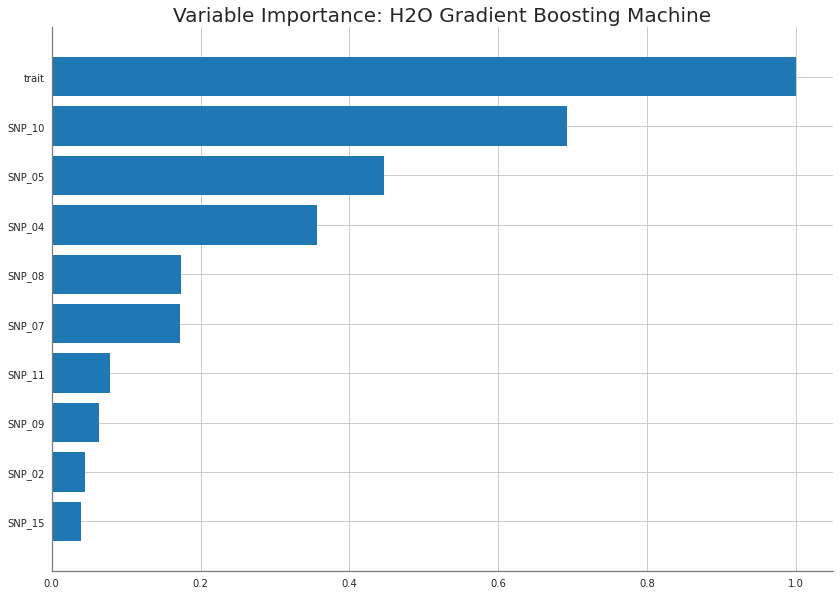

<Figure size 576x396 with 0 Axes>

In [ ]:
aml.leader.varimp_plot()


In [ ]:
best_pred=model_01.predict(h2o_test).as_data_frame().predict

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
submit = pd.read_csv('./data/sample_submission.csv')

In [ ]:
submit

,id,class
0,TEST_000,A
1,TEST_001,B
2,TEST_002,C
3,TEST_003,B
4,TEST_004,A
...,...,...
170,TEST_170,B
171,TEST_171,C
172,TEST_172,C
173,TEST_173,B


In [ ]:
submit['class']=best_pred
submit.to_csv('h2o_gbm_best.csv',index=False)

# LightAutoML

In [ ]:
!pip install -U lightautoml

/usr/local/lib/python3.8/dist-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/local/lib/python3.8/dist-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.6/319.6 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.4/546.4 KB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.1/804.1 MB 865.6 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.7/215.7 KB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 34.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76

  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=4daed6fe8a3424acd65580417f42b77238d8d5e8cd3956f735a80490b8360297
  Stored in directory: /home/work/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built json2html pyperclip
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  NOTE: The current PATH contains path(s) starting with `~`, which may not be expanded by all applications.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  NOTE: The current PATH contains path(s) starting with `~`, which may not be expanded by all applications.
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.4
    Uninstalling scipy-1.5.4:
      Successfully uninstalled scipy-1.5.4
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-war

In [ ]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.dataset.roles import DatetimeRole
from lightautoml.tasks import Task


import torch

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
test=test.iloc[:,4:]

In [ ]:
N_THREADS = 4 # threads cnt for lgbm and linear models
N_FOLDS = 5 # folds cnt for AutoML
RANDOM_STATE = 42 # fixed random state for various reasons
TEST_SIZE = 0.2 # Test size for metric check
TIMEOUT = 300 # Time in seconds for automl run

np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

In [ ]:
def acc_score(y_true, y_pred, **kwargs):
    return accuracy_score(y_true, (y_pred > 0.5).astype(int), **kwargs)

def f1_metric(y_true, y_pred, **kwargs):
    return f1_score(y_true, (y_pred > 0.5).astype(int), **kwargs)

task = Task('multiclass', loss='f1',metric = 'crossentropy')

roles = {
    'target': 'class',
    'drop': ['id','father', 'mother', 'gender'],
}


In [ ]:
%%time 
automl = TabularUtilizedAutoML(task = task, 
                       timeout = TIMEOUT,
                       cpu_limit = N_THREADS,
                       general_params = {'use_algos': [['linear_l2', 'lgb', 'lgb_tuned']]},
                       reader_params = {'n_jobs': N_THREADS})
oof_pred = automl.fit_predict(train, roles = roles)
print('oof_pred:\n{}\nShape = {}'.format(oof_pred[:10], oof_pred.shape))

oof_pred:
array([[9.8885959e-01, 8.3905458e-03, 2.7498875e-03],
       [2.2530496e-02, 9.7396576e-01, 3.5037315e-03],
       [9.9766994e-01, 8.6052861e-04, 1.4695388e-03],
       [1.0098813e-04, 5.5034703e-05, 9.9984396e-01],
       [6.2691158e-01, 3.7269247e-01, 3.9592685e-04],
       [8.4294277e-01, 1.5629694e-01, 7.6029781e-04],
       [9.7839731e-01, 1.8657027e-02, 2.9456040e-03],
       [3.6192271e-01, 6.3297957e-01, 5.0977534e-03],
       [9.4515163e-01, 5.3229958e-02, 1.6184262e-03],
       [7.1052647e-01, 2.8613746e-01, 3.3360997e-03]], dtype=float32)
Shape = (262, 3)
CPU times: user 10min 54s, sys: 9.69 s, total: 11min 4s
Wall time: 3min


In [ ]:
test.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A G,A G,G A,G G,C A,G A
1,2,G G,A G,C C,G G,C C,A A,A A,A A,A A,G G,A G,A A,A A,A A,A A
2,2,G G,A G,A A,A A,C A,A G,A A,A A,A A,A G,A A,G A,G G,A A,G G
3,2,G G,A G,C A,A A,C C,A A,A A,A A,A A,G G,A A,G A,A G,A A,A A
4,1,A A,G G,A A,G G,A A,G G,G G,A A,G G,A G,G G,G A,G G,A A,G G


In [ ]:
test_pred = automl.predict(test)
print('Prediction for test data:\n{}\nShape = {}'.format(test_pred[:10], test_pred.shape))


Prediction for test data:
array([[5.9929746e-03, 6.3228151e-03, 9.8768425e-01],
       [9.8659635e-01, 1.2474044e-02, 9.2966709e-04],
       [7.1442928e-03, 9.8944968e-01, 3.4060234e-03],
       [6.2518919e-01, 3.7359187e-01, 1.2189707e-03],
       [8.2731526e-04, 5.2888150e-04, 9.9864376e-01],
       [6.6879994e-01, 3.2943878e-01, 1.7613226e-03],
       [2.5955342e-02, 9.6833473e-01, 5.7099573e-03],
       [9.8279887e-01, 1.5823036e-02, 1.3781191e-03],
       [1.4971978e-03, 1.5117947e-02, 9.8338485e-01],
       [5.2066642e-04, 5.1894994e-04, 9.9896044e-01]], dtype=float32)
Shape = (175, 3)


In [ ]:
preds=np.argmax(test_pred.data,1)


In [ ]:
submit = pd.read_csv('./data/sample_submission.csv')

In [ ]:
submit['class'] = class_le.inverse_transform(preds)

In [ ]:
submit['class']=preds

In [ ]:
submit['class']=submit['class'].apply(lambda x: 'A' if x == 2 else ( 'B' if x == 0 else 'C' ))

In [ ]:
submit

,id,class
0,TEST_000,A
1,TEST_001,B
2,TEST_002,C
3,TEST_003,B
4,TEST_004,A
...,...,...
170,TEST_170,B
171,TEST_171,C
172,TEST_172,C
173,TEST_173,B


In [ ]:
submit.to_csv('lightautoml.csv', index=False)

# Tpot

In [ ]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=2f8cd2609ae787dd31f01f77c2cb06b2924cda322d0401e013823b4f2fe96257
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.3 MB/s eta 0:00:00


In [ ]:
import sys, os, os.path
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import os
import numpy as np

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from category_encoders.cat_boost import CatBoostEncoder

from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

train = pd.read_csv('./drive/MyDrive/input/유전체 정보 품종 분류 AI 경진대회/train.csv')
test = pd.read_csv('./drive/MyDrive/input/유전체 정보 품종 분류 AI 경진대회/test.csv')

train['SNP_01_first'] = train['SNP_01'].str.get(0)
train['SNP_01_last'] = train['SNP_01'].str.get(2)
train['SNP_02_first'] = train['SNP_02'].str.get(0)
train['SNP_02_last'] = train['SNP_02'].str.get(2)
train['SNP_03_first'] = train['SNP_03'].str.get(0)
train['SNP_03_last'] = train['SNP_03'].str.get(2)
train['SNP_04_first'] = train['SNP_04'].str.get(0)
train['SNP_04_last'] = train['SNP_04'].str.get(2)
train['SNP_05_first'] = train['SNP_05'].str.get(0)
train['SNP_05_last'] = train['SNP_05'].str.get(2)
train['SNP_06_first'] = train['SNP_06'].str.get(0)
train['SNP_06_last'] = train['SNP_06'].str.get(2)
train['SNP_07_first'] = train['SNP_07'].str.get(0)
train['SNP_07_last'] = train['SNP_07'].str.get(2)
train['SNP_08_first'] = train['SNP_08'].str.get(0)
train['SNP_08_last'] = train['SNP_08'].str.get(2)
train['SNP_09_first'] = train['SNP_09'].str.get(0)
train['SNP_09_last'] = train['SNP_09'].str.get(2)
train['SNP_10_first'] = train['SNP_10'].str.get(0)
train['SNP_10_last'] = train['SNP_10'].str.get(2)
train['SNP_11_first'] = train['SNP_11'].str.get(0)
train['SNP_11_last'] = train['SNP_11'].str.get(2)
train['SNP_12_first'] = train['SNP_12'].str.get(0)
train['SNP_12_last'] = train['SNP_12'].str.get(2)
train['SNP_13_first'] = train['SNP_13'].str.get(0)
train['SNP_13_last'] = train['SNP_13'].str.get(2)
train['SNP_14_first'] = train['SNP_14'].str.get(0)
train['SNP_14_last'] = train['SNP_14'].str.get(2)
train['SNP_15_first'] = train['SNP_15'].str.get(0)
train['SNP_15_last'] = train['SNP_15'].str.get(2)

test['SNP_01_first'] = test['SNP_01'].str.get(0)
test['SNP_01_last'] = test['SNP_01'].str.get(2)
test['SNP_02_first'] = test['SNP_02'].str.get(0)
test['SNP_02_last'] = test['SNP_02'].str.get(2)
test['SNP_03_first'] = test['SNP_03'].str.get(0)
test['SNP_03_last'] = test['SNP_03'].str.get(2)
test['SNP_04_first'] = test['SNP_04'].str.get(0)
test['SNP_04_last'] = test['SNP_04'].str.get(2)
test['SNP_05_first'] = test['SNP_05'].str.get(0)
test['SNP_05_last'] = test['SNP_05'].str.get(2)
test['SNP_06_first'] = test['SNP_06'].str.get(0)
test['SNP_06_last'] = test['SNP_06'].str.get(2)
test['SNP_07_first'] = test['SNP_07'].str.get(0)
test['SNP_07_last'] = test['SNP_07'].str.get(2)
test['SNP_08_first'] = test['SNP_08'].str.get(0)
test['SNP_08_last'] = test['SNP_08'].str.get(2)
test['SNP_09_first'] = test['SNP_09'].str.get(0)
test['SNP_09_last'] = test['SNP_09'].str.get(2)
test['SNP_10_first'] = test['SNP_10'].str.get(0)
test['SNP_10_last'] = test['SNP_10'].str.get(2)
test['SNP_11_first'] = test['SNP_11'].str.get(0)
test['SNP_11_last'] = test['SNP_11'].str.get(2)
test['SNP_12_first'] = test['SNP_12'].str.get(0)
test['SNP_12_last'] = test['SNP_12'].str.get(2)
test['SNP_13_first'] = test['SNP_13'].str.get(0)
test['SNP_13_last'] = test['SNP_13'].str.get(2)
test['SNP_14_first'] = test['SNP_14'].str.get(0)
test['SNP_14_last'] = test['SNP_14'].str.get(2)
test['SNP_15_first'] = test['SNP_15'].str.get(0)
test['SNP_15_last'] = test['SNP_15'].str.get(2)
train.shape

(262, 51)

In [ ]:

def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x
    
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]

snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)
    
train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)

for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])

train_x['label']=train_y

train_x=train_x.iloc[:,3:]
test_x=test_x.iloc[:,3:]


cat_train_df = train_x.copy()
cat_test_df = train_y.copy()

ce = CatBoostEncoder()

columns_list=list(cat_train_df.columns)

columns_list.remove('label')

train_x[columns_list] = ce.fit_transform(train_x[columns_list], train_x['label'])
test_x[columns_list] = ce.transform(test_x[columns_list])

In [ ]:
from sklearn.model_selection import train_test_split

X = train_x.drop(columns=['label'])
y = train_x['label']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [ ]:
X_train.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_11_first,SNP_11_last,SNP_12_first,SNP_12_last,SNP_13_first,SNP_13_last,SNP_14_first,SNP_14_last,SNP_15_first,SNP_15_last
26,2,5,5,3,4,3,0,0,4,0,...,1.239913,1.419847,0.503817,1.219051,1.265167,1.047189,1.183553,1.078391,1.233705,1.296363
3,1,0,5,0,4,0,5,5,0,5,...,1.038168,1.019084,1.519084,1.038168,1.519084,1.519084,1.259542,1.259542,1.038168,1.038168
41,2,5,1,2,0,3,1,0,5,0,...,1.201272,0.681527,0.502120,1.177593,1.186599,0.910248,1.086805,1.000954,1.151908,1.173730
48,2,5,1,2,0,2,0,4,4,0,...,1.207005,1.317798,1.270699,1.150954,1.157443,1.103817,1.100954,1.000830,1.175573,1.177593
35,2,0,0,0,0,2,0,0,4,0,...,1.186599,1.335878,1.287532,1.173730,1.168257,1.004771,1.067939,1.001123,0.738851,1.168257


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

def my_custom_accuracy(y_true, y_pred):
    score = f1_score(y_true, y_pred, average='macro')
    return score

In [ ]:
my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

tpot = TPOTClassifier(generations=50, population_size=50, verbosity=2, random_state=42,scoring=my_custom_scorer,max_eval_time_mins=500)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_digits_pipeline_test.py')

Optimization Progress:   0%|          | 0/2550 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LogisticRegression(RobustScaler(input_matrix), C=10.0, dual=False, penalty=l2)
0.9649572649572651


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline, make_union
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.neural_network import MLPClassifier

In [ ]:
# Average CV score on the training set was: 0.9671786451394295
exported_pipeline = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, max_features=0.1, min_samples_leaf=1, min_samples_split=6, n_estimators=100, subsample=0.8)
exported_pipeline1 = MLPClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=7, min_samples_split=17), alpha=0.1, learning_rate_init=0.001)
# Fix random state in exported estimator
if hasattr(exported_pipeline1, 'random_state'):
    setattr(exported_pipeline1, 'random_state', 42)

exported_pipeline1.fit(X, train_y)
results = exported_pipeline1.predict(test_x)

TypeError: ignored

In [ ]:
train_y

array([1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0,
       2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0,
       1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 0, 0, 2, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2,
       2, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1])

In [ ]:
X

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,2,5,1,0,4,2,0,0,5,0,5,1,0,0,0,0
1,2,1,1,2,0,0,1,0,4,0,1,0,4,5,0,0
2,2,5,5,0,4,3,5,0,4,4,1,0,0,0,0,0
3,1,0,5,0,4,0,5,5,0,5,1,5,5,5,0,5
4,2,5,5,3,0,3,0,0,0,0,5,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2,1,1,0,4,3,1,0,4,0,5,1,4,0,0,0
258,2,5,0,2,0,0,1,4,4,0,1,1,0,1,0,4
259,1,1,5,0,4,0,1,5,4,4,0,5,5,5,2,5
260,1,0,5,0,4,0,5,5,0,4,1,1,4,5,2,5


In [ ]:
submit = pd.read_csv('./drive/MyDrive/input/유전체 정보 품종 분류 AI 경진대회/sample_submission.csv')
submit['class'] = class_le.inverse_transform(results)
submit.to_csv('tpot_test.csv', index=False)
submit

In [ ]:
submit.to_csv('tpot_test.csv', index=False)

,id,class
0,TEST_000,A
1,TEST_001,B
2,TEST_002,C
3,TEST_003,B
4,TEST_004,A
...,...,...
170,TEST_170,B
171,TEST_171,C
172,TEST_172,C
173,TEST_173,B


In [ ]:
submit['class'].value_counts()

B    86
A    51
C    38
Name: class, dtype: int64

# best_score 파라미터

In [ ]:
# # Average CV score on the training set was: 0.9723435503043347
# exported_pipeline = make_pipeline(
#     StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.5, max_depth=7, max_features=0.8, min_samples_leaf=9, min_samples_split=5, n_estimators=100, subsample=0.2)),
#     GradientBoostingClassifier(learning_rate=0.1, max_depth=9, max_features=0.8500000000000001, min_samples_leaf=16, min_samples_split=20, n_estimators=100, subsample=0.6000000000000001)
# )
# # Fix random state for all the steps in exported pipeline
# set_param_recursive(exported_pipeline.steps, 'random_state', 42)

In [ ]:
# Average CV score on the training set was: 0.9631683010073815
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=DecisionTreeClassifier(criterion="gini", max_depth=2, min_samples_leaf=12, min_samples_split=9)),
    StackingEstimator(estimator=MultinomialNB(alpha=1.0, fit_prior=True)),
    StackingEstimator(estimator=LinearSVC(C=15.0, dual=True, loss="squared_hinge", penalty="l2", tol=0.0001)),
    GradientBoostingClassifier(learning_rate=0.1, max_depth=5, max_features=0.25, min_samples_leaf=18, min_samples_split=14, n_estimators=100, subsample=0.5)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

In [ ]:
target=train_x['label']
new_train_df=train_x.iloc[:,:-1]

In [ ]:
new_train_df

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_11_first,SNP_11_last,SNP_12_first,SNP_12_last,SNP_13_first,SNP_13_last,SNP_14_first,SNP_14_last,SNP_15_first,SNP_15_last
0,2,5,1,0,4,2,0,0,5,0,...,1.038168,1.038168,1.038168,1.038168,1.038168,1.038168,1.038168,1.038168,1.038168,1.038168
1,2,1,1,2,0,0,1,0,4,0,...,1.019084,1.038168,1.038168,1.019084,1.038168,1.038168,1.019084,1.019084,1.019084,1.019084
2,2,5,5,0,4,3,5,0,4,4,...,1.346056,1.519084,1.019084,1.346056,1.019084,1.019084,1.346056,1.346056,1.346056,1.346056
3,1,0,5,0,4,0,5,5,0,5,...,1.038168,1.019084,1.519084,1.038168,1.519084,1.519084,1.259542,1.259542,1.038168,1.038168
4,2,5,5,3,0,3,0,0,0,0,...,1.259542,1.346056,1.012723,1.259542,1.012723,1.012723,1.007634,1.007634,0.519084,1.259542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2,1,1,0,4,3,1,0,4,0,...,1.358171,0.789990,0.645469,1.276884,1.301631,1.173811,1.262504,1.127822,1.262039,1.219698
258,2,5,0,2,0,0,1,4,4,0,...,1.356148,0.791176,1.407690,1.275547,1.299579,1.009846,1.261077,1.127280,0.888409,1.218632
259,1,1,5,0,4,0,1,5,4,4,...,0.373954,0.797967,0.648305,0.132796,0.708302,1.014607,0.513660,1.130963,0.895674,0.371077
260,1,0,5,0,4,0,5,5,0,4,...,1.359765,0.793509,0.643160,1.279030,0.702089,1.009752,0.506989,1.126211,0.889858,0.364330


In [ ]:
exported_pipeline.fit(new_train_df,target)
results = exported_pipeline.predict(test_x)

In [ ]:
submit = pd.read_csv('./drive/MyDrive/input/유전체 정보 품종 분류 AI 경진대회/sample_submission.csv')
submit['class'] = class_le.inverse_transform(results)
submit['class']=results

submit['class']=submit['class'].apply(lambda x: 'A' if x == 0 else ( 'B' if x == 1 else 'C' ))
submit.to_csv('tpot3.csv', index=False)

In [ ]:
submit

,id,class
0,TEST_000,A
1,TEST_001,B
2,TEST_002,C
3,TEST_003,C
4,TEST_004,A
...,...,...
170,TEST_170,B
171,TEST_171,C
172,TEST_172,C
173,TEST_173,B


# PCA, tsne, umap

In [ ]:
class_le = preprocessing.LabelEncoder()
train=train.iloc[:,4:]
test=test.iloc[:,4:]
train_y=train['class']
train_y = class_le.fit_transform(train_y)
train.drop('class',axis=1,inplace=True)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

SNP_DF=train.iloc[:,1:]
SNP_DF_test=test.iloc[:,1:]

from sklearn.decomposition import PCA

pca = PCA(n_components = 15) 

pc = pca.fit_transform(SNP_DF)
pc = pd.DataFrame(pc)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(SNP_DF)

from bokeh.layouts import gridplot
from sklearn.manifold import TSNE
grids = []
for perplexity in [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    tsne_results = TSNE(n_components=2, perplexity=perplexity,n_iter=10000).fit_transform(SNP_DF)
    tsne = pd.DataFrame(tsne_results, columns = ['tsne1', 'tsne2'])
    tsne = pd.concat((tsne, pd.DataFrame(train_y)), axis=1)
    plt.figure(figsize=(7,7))
    t=sns.scatterplot(x='tsne1', y='tsne2', hue=0, data=tsne)
    plt.show()


    
y=pd.DataFrame(train_y)
y.columns=['label']

tsne = pd.DataFrame(tsne_results, columns = ['tsne1', 'tsne2'])
tsne = pd.concat((tsne, pd.DataFrame(train_y)), axis=1)

plt.figure(figsize=(7,7))
sns.scatterplot(x='tsne1', y='tsne2', hue=0, data=tsne)
plt.show()